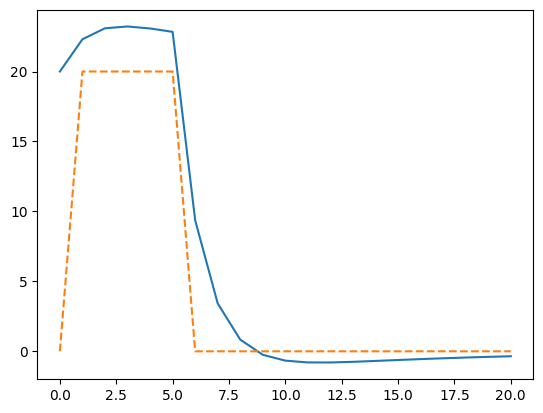

In [12]:
import numpy as np
import math

class PIController:
    def __init__(self, Kp=1.0, Ki=1.0):
        self.Kp = Kp  # Proportional gain
        self.Ki = Ki  # Integral gain
        self.integral_error = 0.0  # Integral error

    def control(self, x_ref, x, dt):
        error = x_ref - x
        self.integral_error += error * dt
        u = self.Kp * error + self.Ki * self.integral_error
        return u

dt = 0.02  # Time step
controller = PIController(Kp=30.0, Ki=3.0/dt)

x = 20.0  # Initial system state
xs, us, xs_ref = [x], [0.0], [0.0]
for t in np.arange(0.0, 0.4, dt):
    if t < 0.1:
        x_ref = 20.0 # Desired state
    else:
        x_ref = 0.0
    sigma = 0.01*9.8*0.02  # Disturbance
    u = controller.control(x_ref, x, dt)
    x += (u + sigma/1.7e-5)*dt  # Update system state with control input and disturbance
    xs.append(x)
    us.append(u)
    xs_ref.append(x_ref)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(xs, label='x')
plt.plot(xs_ref, label='x_ref', linestyle='--')
